In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']        # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False          # 正常显示负号

In [2]:
df = pd.read_csv('C:/Users/Administrator/Desktop/traffic_accidents_fully_translated_final.csv',
                 index_col='事故日期',
                 parse_dates=['事故日期'],
                encoding='gbk')
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14440\1545902206.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('C:/Users/Administrator/Desktop/traffic_accidents_fully_translated_final.csv',


,交通控制装置,天气状况,光照条件,首次碰撞类型,道路类型,道路对齐情况,路面状况,道路缺陷,事故类型,是否与路口有关的事故,...,最严重伤情,总受伤人数,致命伤人数,丧失行动能力的伤者人数,非丧失行动能力的伤者人数,报告但无明显伤的伤者人数,无伤情迹象的人数,事故发生小时,事故发生星期,事故发生月份
事故日期,,,,,,,,,,,,,,,,,,,,,
2023-07-29 13:00:00,交通信号灯,晴朗,白天,转弯,无隔离带,平直,未知,未知,无伤/车辆自行驶离,Y,...,无伤迹,0,0,0,0,0,3,13,7,7
2023-08-13 00:11:00,交通信号灯,晴朗,黑暗，有路灯,转弯,四路交叉口,平直,干燥,无缺陷,无伤/车辆自行驶离,Y,...,无伤迹,0,0,0,0,0,2,0,1,8
2021-12-09 10:30:00,交通信号灯,晴朗,白天,追尾,丁字路口,平直,干燥,无缺陷,无伤/车辆自行驶离,Y,...,无伤迹,0,0,0,0,0,3,10,5,12
2023-08-09 19:55:00,交通信号灯,晴朗,白天,角度碰撞,四路交叉口,平直,干燥,无缺陷,有伤/或事故后需拖车,Y,...,非致残性伤害,5,0,0,5,0,0,19,4,8
2023-08-19 14:55:00,交通信号灯,晴朗,白天,追尾,丁字路口,平直,未知,未知,无伤/车辆自行驶离,Y,...,无伤迹,0,0,0,0,0,3,14,7,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209306 entries, 2023-07-29 13:00:00 to 2022-12-16 12:10:00
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   交通控制装置        209306 non-null  object
 1   天气状况          209306 non-null  object
 2   光照条件          209306 non-null  object
 3   首次碰撞类型        209306 non-null  object
 4   道路类型          209306 non-null  object
 5   道路对齐情况        209306 non-null  object
 6   路面状况          209306 non-null  object
 7   道路缺陷          209306 non-null  object
 8   事故类型          209306 non-null  object
 9   是否与路口有关的事故    209306 non-null  object
 10  损坏程度          209306 non-null  object
 11  主要肇事原因        209306 non-null  object
 12  涉及车辆数         209306 non-null  int64 
 13  最严重伤情         209306 non-null  object
 14  总受伤人数         209306 non-null  int64 
 15  致命伤人数         209306 non-null  int64 
 16  丧失行动能力的伤者人数   209306 non-null  int64 
 17  非丧失行动能力的伤者人数  209306 non-null  in

In [4]:
df['年份'] = df.index.year
df['月'] = df.index.month
df['日期']  = df.index.day
df = df[~df['首次碰撞类型'].astype(str).str.contains(r'[A-Za-z]', na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199211 entries, 2023-07-29 13:00:00 to 2022-12-16 12:10:00
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   交通控制装置        199211 non-null  object
 1   天气状况          199211 non-null  object
 2   光照条件          199211 non-null  object
 3   首次碰撞类型        199211 non-null  object
 4   道路类型          199211 non-null  object
 5   道路对齐情况        199211 non-null  object
 6   路面状况          199211 non-null  object
 7   道路缺陷          199211 non-null  object
 8   事故类型          199211 non-null  object
 9   是否与路口有关的事故    199211 non-null  object
 10  损坏程度          199211 non-null  object
 11  主要肇事原因        199211 non-null  object
 12  涉及车辆数         199211 non-null  int64 
 13  最严重伤情         199211 non-null  object
 14  总受伤人数         199211 non-null  int64 
 15  致命伤人数         199211 non-null  int64 
 16  丧失行动能力的伤者人数   199211 non-null  int64 
 17  非丧失行动能力的伤者人数  199211 non-null  in

In [5]:
a = df.groupby('首次碰撞类型')[['首次碰撞类型']].value_counts().sort_values()
a = pd.DataFrame(a)
a

,count
首次碰撞类型,
其他非碰撞,249
正面碰撞,1790
固定物体,4742
停放的机动车,4893
行人,8996
同向侧擦,20116
追尾,42018
角度碰撞,52250
转弯,64157


In [6]:
b = df.groupby('年份')[['年份']].value_counts().sort_values()
b = pd.DataFrame(b)
b = b.iloc[1: ]
b.columns = ['事故数量']
b

,事故数量
年份,
2025,994
2015,1862
2016,7433
2017,16931
2020,21593
2023,24106
2022,24255
2021,24433
2024,24638


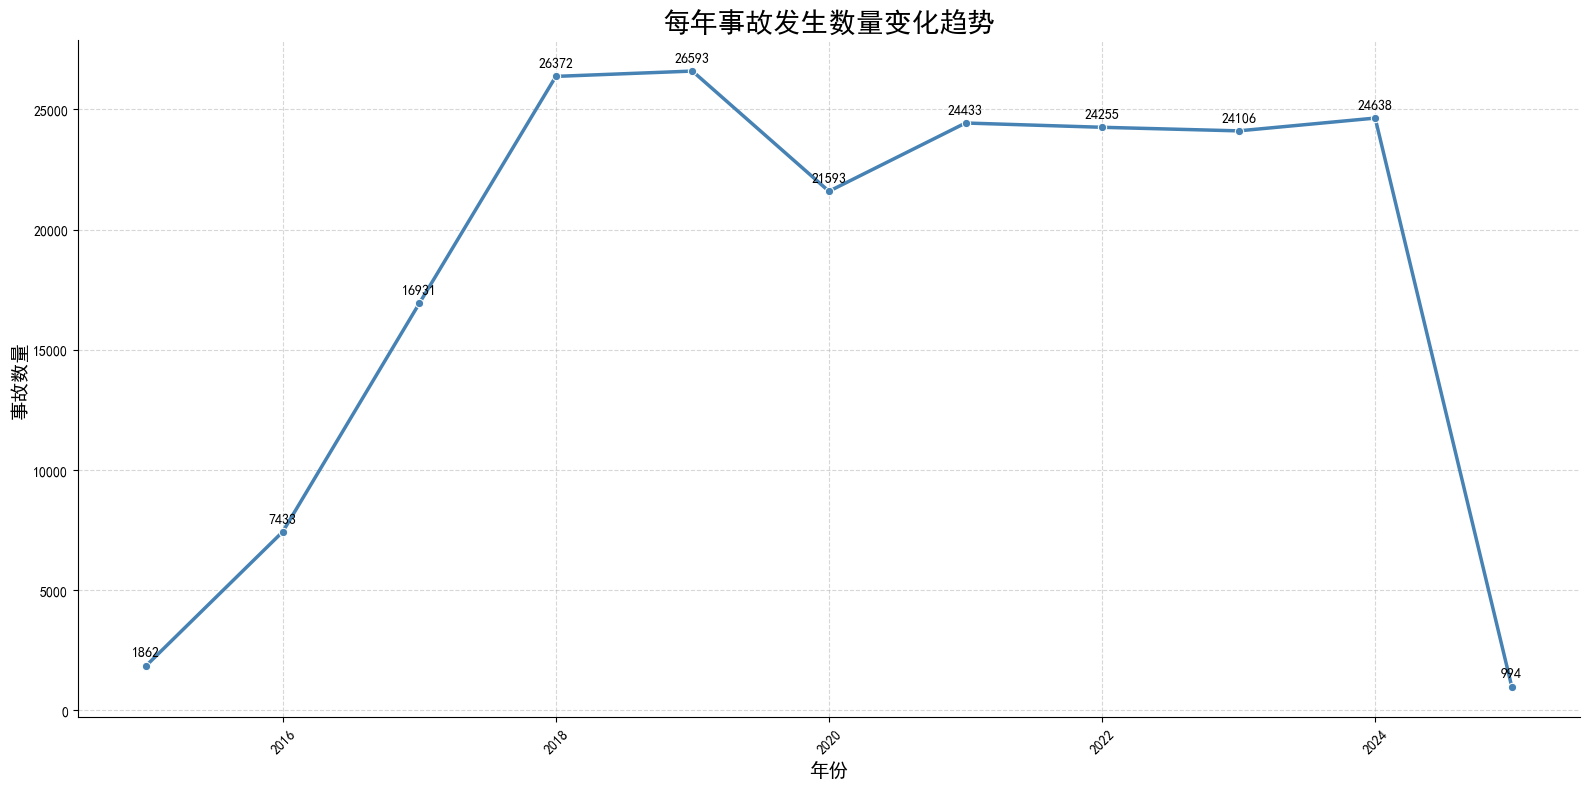

In [7]:

plt.figure(figsize=(16, 8))

# 折线图，x 轴是 index（年份），y 轴是事故数量
sns.lineplot(x=b.index, y=b['事故数量'], marker='o', linewidth=2.5, color='steelblue')

# 图表标题
plt.title('每年事故发生数量变化趋势', fontsize=20)

# 坐标轴标签
plt.xlabel('年份', fontsize=14)
plt.ylabel('事故数量', fontsize=14)

# 添加数据点注释
for i in range(len(b)):
    plt.text(x=b.index[i], y=b['事故数量'].iloc[i] + 300, s=str(b['事故数量'].iloc[i]),
             ha='center', va='bottom', fontsize=10, color='black')

# 美化图表
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
c = df.groupby('事故发生星期')[['事故发生星期']].value_counts().sort_values()
c = pd.DataFrame(c)
c.columns = [ '事故数量']
c

,事故数量
事故发生星期,
1,24133
2,26582
4,28583
3,28614
5,29194
7,29288
6,32817


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14440\709371227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=c_reset, x='事故发生星期', y='事故数量', palette='Blues')


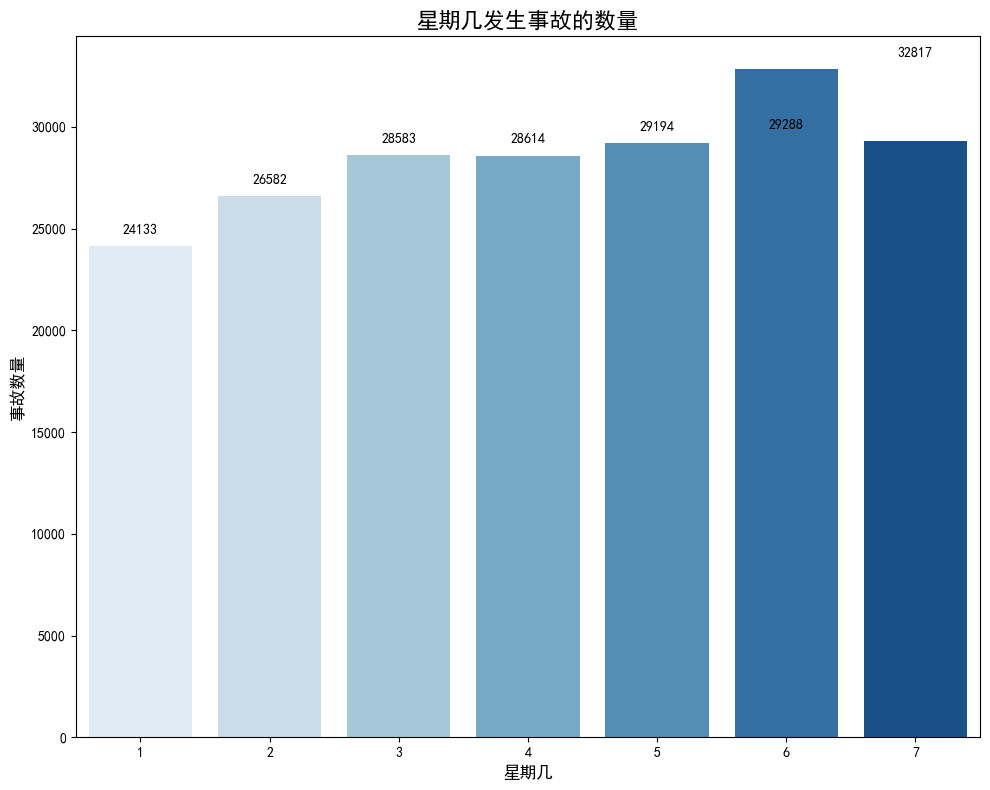

In [9]:
c_reset = c.reset_index()  # 将“事故发生星期”变为一列

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=c_reset, x='事故发生星期', y='事故数量', palette='Blues')

# 设置标题
ax.set_title('星期几发生事故的数量', fontsize=16)
ax.set_xlabel('星期几', fontsize=12)
ax.set_ylabel('事故数量', fontsize=12)

# 添加数据标签
for i in range(len(c_reset)):
    ax.text(x=i, y=c_reset['事故数量'][i] + 500, s=str(c_reset['事故数量'][i]), 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [10]:
d = df.groupby(['日期','事故发生小时'])['事故发生小时'].value_counts()
d  = pd.DataFrame(d)
d =d.reset_index()
d = d.rename(columns={'count': '事故发生数量'})
d

,日期,事故发生小时,事故发生数量
0,1,0,149
1,1,1,158
2,1,2,169
3,1,3,123
4,1,4,90
...,...,...,...
739,31,19,164
740,31,20,172
741,31,21,150
742,31,22,154


In [11]:
df_wide = d.pivot_table(index='日期', columns='事故发生小时', values='事故发生数量')
df_wide

事故发生小时,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
日期,,,,,,,,,,,,,,,,,,,,,
1,149.0,158.0,169.0,123.0,90.0,102.0,133.0,281.0,359.0,325.0,...,411.0,492.0,539.0,523.0,439.0,299.0,233.0,245.0,208.0,183.0
2,134.0,106.0,78.0,70.0,65.0,88.0,153.0,275.0,344.0,272.0,...,431.0,474.0,468.0,463.0,384.0,278.0,229.0,208.0,203.0,187.0
3,154.0,104.0,88.0,65.0,58.0,82.0,154.0,265.0,363.0,300.0,...,389.0,529.0,503.0,475.0,421.0,295.0,264.0,256.0,205.0,194.0
4,126.0,137.0,91.0,87.0,62.0,68.0,142.0,273.0,317.0,278.0,...,424.0,480.0,492.0,447.0,370.0,300.0,246.0,243.0,251.0,196.0
5,158.0,130.0,98.0,75.0,57.0,97.0,139.0,298.0,355.0,278.0,...,436.0,501.0,494.0,507.0,417.0,293.0,278.0,267.0,250.0,173.0
6,148.0,112.0,87.0,86.0,65.0,89.0,178.0,267.0,395.0,295.0,...,407.0,500.0,527.0,506.0,393.0,318.0,227.0,208.0,192.0,154.0
7,118.0,102.0,81.0,75.0,56.0,75.0,134.0,343.0,359.0,302.0,...,423.0,458.0,479.0,506.0,435.0,270.0,255.0,223.0,210.0,171.0
8,118.0,109.0,88.0,60.0,45.0,83.0,139.0,311.0,374.0,284.0,...,428.0,548.0,455.0,511.0,365.0,298.0,234.0,209.0,207.0,185.0
9,164.0,85.0,104.0,79.0,66.0,87.0,144.0,342.0,380.0,283.0,...,426.0,491.0,508.0,520.0,416.0,311.0,265.0,244.0,228.0,178.0


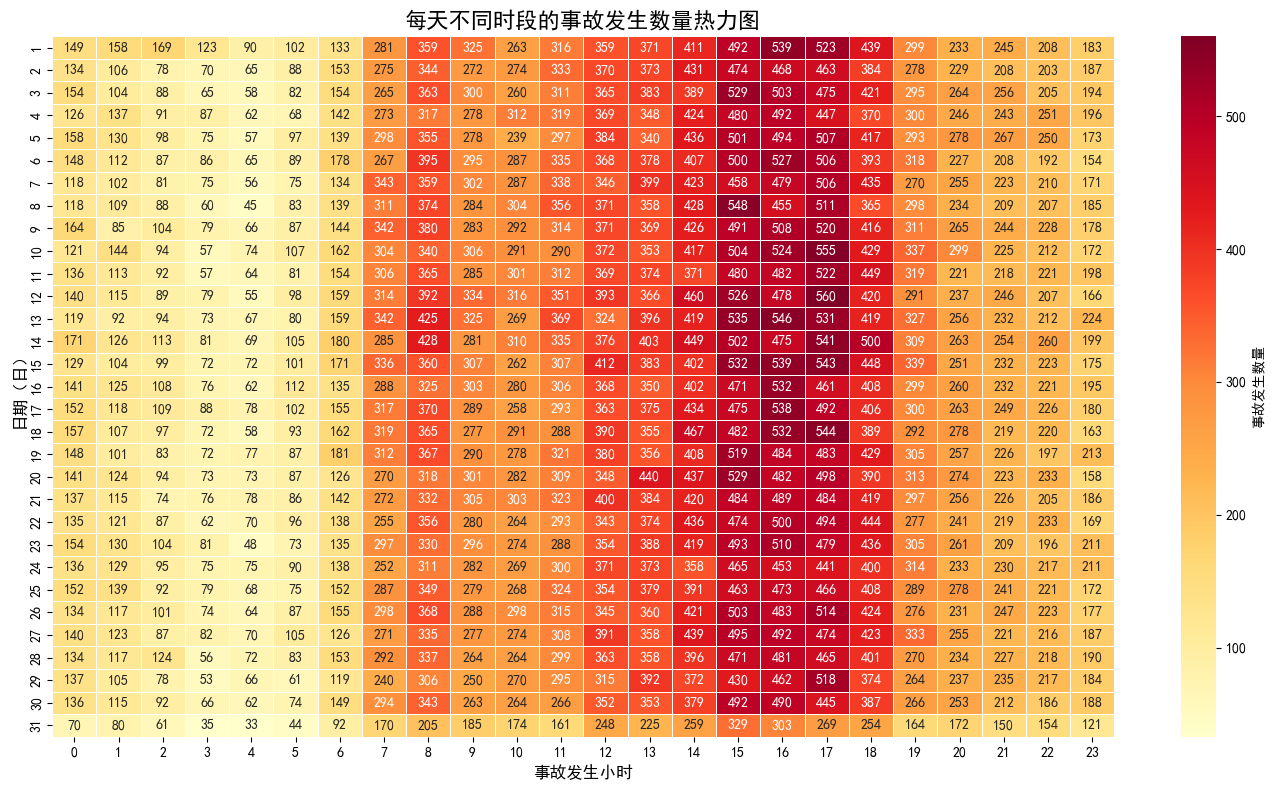

In [12]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_wide, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=.5, cbar_kws={"label": "事故发生数量"})

plt.title('每天不同时段的事故发生数量热力图', fontsize=16)
plt.xlabel('事故发生小时', fontsize=12)
plt.ylabel('日期（日）', fontsize=12)
plt.tight_layout()
plt.show()

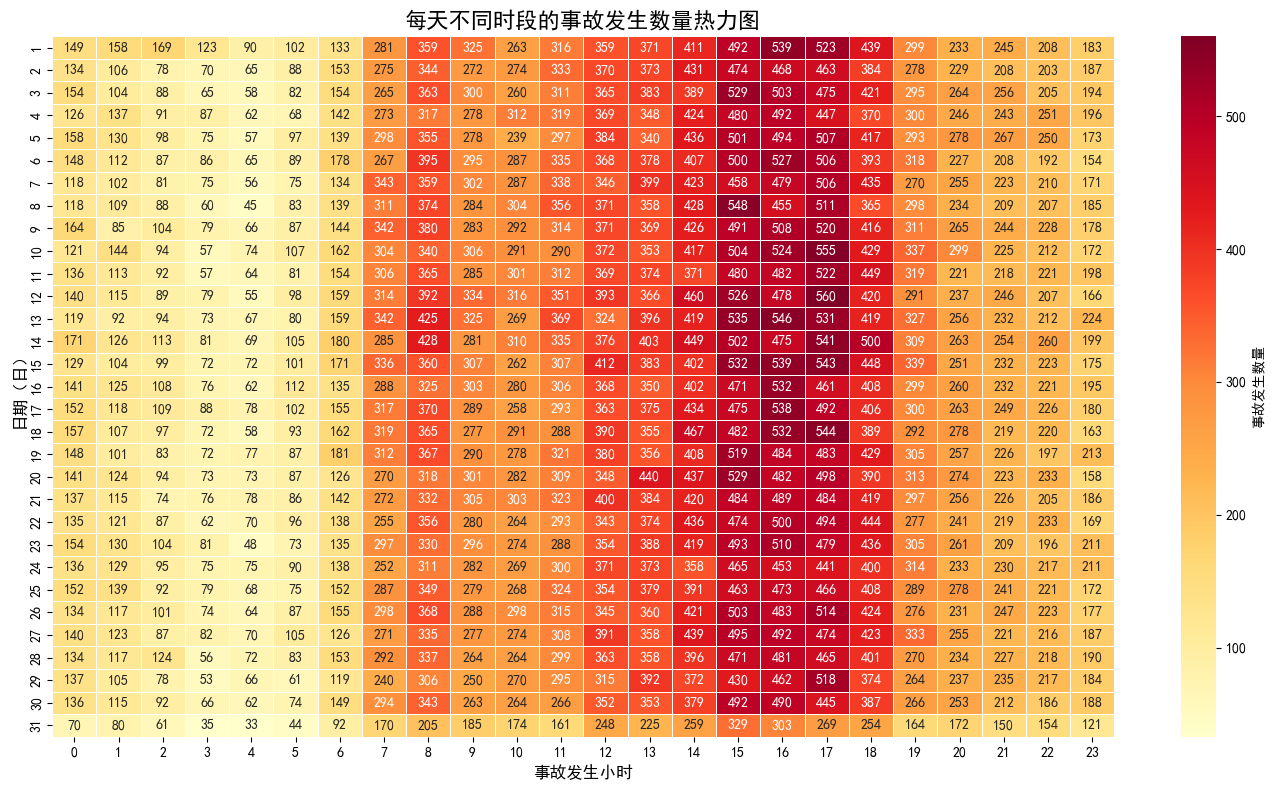

In [13]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_wide, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=.5, cbar_kws={"label": "事故发生数量"})

plt.title('每天不同时段的事故发生数量热力图', fontsize=16)
plt.xlabel('事故发生小时', fontsize=12)
plt.ylabel('日期（日）', fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
df.head()

,交通控制装置,天气状况,光照条件,首次碰撞类型,道路类型,道路对齐情况,路面状况,道路缺陷,事故类型,是否与路口有关的事故,...,丧失行动能力的伤者人数,非丧失行动能力的伤者人数,报告但无明显伤的伤者人数,无伤情迹象的人数,事故发生小时,事故发生星期,事故发生月份,年份,月,日期
事故日期,,,,,,,,,,,,,,,,,,,,,
2023-07-29 13:00:00,交通信号灯,晴朗,白天,转弯,无隔离带,平直,未知,未知,无伤/车辆自行驶离,Y,...,0,0,0,3,13,7,7,2023,7,29
2023-08-13 00:11:00,交通信号灯,晴朗,黑暗，有路灯,转弯,四路交叉口,平直,干燥,无缺陷,无伤/车辆自行驶离,Y,...,0,0,0,2,0,1,8,2023,8,13
2021-12-09 10:30:00,交通信号灯,晴朗,白天,追尾,丁字路口,平直,干燥,无缺陷,无伤/车辆自行驶离,Y,...,0,0,0,3,10,5,12,2021,12,9
2023-08-09 19:55:00,交通信号灯,晴朗,白天,角度碰撞,四路交叉口,平直,干燥,无缺陷,有伤/或事故后需拖车,Y,...,0,5,0,0,19,4,8,2023,8,9
2023-08-19 14:55:00,交通信号灯,晴朗,白天,追尾,丁字路口,平直,未知,未知,无伤/车辆自行驶离,Y,...,0,0,0,3,14,7,8,2023,8,19


In [15]:
df['事故时间段'] = df['事故发生小时'].apply(
    lambda x: '凌晨' if 0 <= x < 6
    else '早晨' if 6 <= x < 12
    else '下午' if 12 <= x < 18
    else '晚上'
)
df.head()

,交通控制装置,天气状况,光照条件,首次碰撞类型,道路类型,道路对齐情况,路面状况,道路缺陷,事故类型,是否与路口有关的事故,...,非丧失行动能力的伤者人数,报告但无明显伤的伤者人数,无伤情迹象的人数,事故发生小时,事故发生星期,事故发生月份,年份,月,日期,事故时间段
事故日期,,,,,,,,,,,,,,,,,,,,,
2023-07-29 13:00:00,交通信号灯,晴朗,白天,转弯,无隔离带,平直,未知,未知,无伤/车辆自行驶离,Y,...,0,0,3,13,7,7,2023,7,29,下午
2023-08-13 00:11:00,交通信号灯,晴朗,黑暗，有路灯,转弯,四路交叉口,平直,干燥,无缺陷,无伤/车辆自行驶离,Y,...,0,0,2,0,1,8,2023,8,13,凌晨
2021-12-09 10:30:00,交通信号灯,晴朗,白天,追尾,丁字路口,平直,干燥,无缺陷,无伤/车辆自行驶离,Y,...,0,0,3,10,5,12,2021,12,9,早晨
2023-08-09 19:55:00,交通信号灯,晴朗,白天,角度碰撞,四路交叉口,平直,干燥,无缺陷,有伤/或事故后需拖车,Y,...,5,0,0,19,4,8,2023,8,9,晚上
2023-08-19 14:55:00,交通信号灯,晴朗,白天,追尾,丁字路口,平直,未知,未知,无伤/车辆自行驶离,Y,...,0,0,3,14,7,8,2023,8,19,下午


In [16]:
df.groupby(['月','事故发生星期','事故时间段'])['事故发生星期'].count()

月   事故发生星期  事故时间段
1   1       下午        653
            凌晨        387
            早晨        293
            晚上        416
    2       下午        905
                     ... 
12  6       晚上        902
    7       下午       1028
            凌晨        407
            早晨        516
            晚上        814
Name: 事故发生星期, Length: 336, dtype: int64

In [17]:
w_reset = df['道路类型'].value_counts().head(10).reset_index()
w_reset.columns = ['道路类型', '数量']
w_reset

,道路类型,数量
0,无隔离带,73902
1,四路交叉口,46676
2,DIVIDED - W/MEDIAN (NOT RAISED),32889
3,单行道,11641
4,DIVIDED - W/MEDIAN BARRIER,10366
5,丁字路口,8692
6,其他,4526
7,中央转弯车道,2745
8,UNKNOWN INTERSECTION TYPE,1773
9,"FIVE POINT, OR MORE",1050


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14440\922393007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data =w_reset,  x='道路类型', y='数量', palette='Blues')


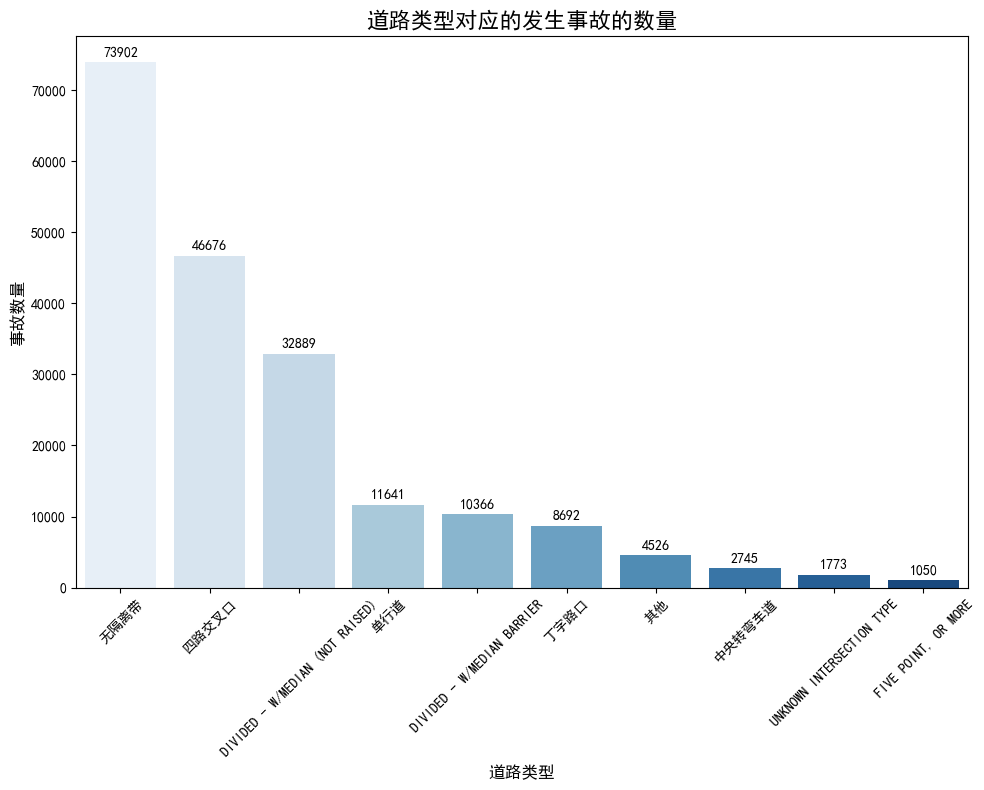

In [18]:


plt.figure(figsize=(10, 8))
ax = sns.barplot(data =w_reset,  x='道路类型', y='数量', palette='Blues')

# 设置标题
ax.set_title('道路类型对应的发生事故的数量', fontsize=16)
ax.set_xlabel('道路类型', fontsize=12)
ax.set_ylabel('事故数量', fontsize=12)

# 添加数据标签
for i in range(len(w_reset)):
    ax.text(x=i, y=w_reset['数量'][i] + 500, s=str(w_reset['数量'][i]), 
            ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)  # 可选：如果道路类型名字较长
plt.tight_layout()
plt.show()

In [19]:
df['最严重伤情'] = df['最严重伤情'].apply(lambda x: '致命伤' if x == 'FATAL' else x)
aa = df['最严重伤情'].value_counts()
aa

最严重伤情
无伤迹        149642
非致残性伤害      28146
报告但无明显伤     15201
致残性伤害        5893
致命伤           329
Name: count, dtype: int64

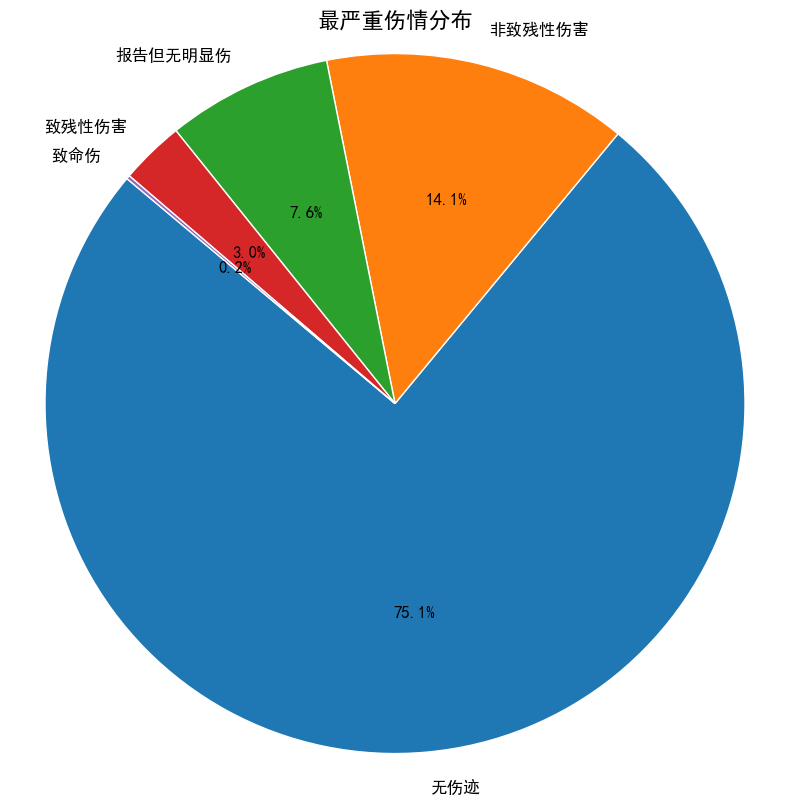

In [20]:
import matplotlib.pyplot as plt

# 如果你还没有 aa，可以这样获得：
# aa = df['最严重伤情'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    aa.values,               # 数据数量
    labels=aa.index,         # 标签文字
    autopct='%1.1f%%',       # 百分比显示格式
    startangle=140,          # 起始角度
    wedgeprops={'edgecolor': 'white'},  # 白边分隔更清晰
    textprops={'fontsize': 12}  # 字体大小
)

plt.title('最严重伤情分布', fontsize=16)
plt.axis('equal')  # 保证是正圆
plt.tight_layout()
plt.show()


In [22]:
toshibiao = df.pivot_table(index='月', 
                                  columns=['事故发生星期'], 
                                  values='事故发生小时', 
                                  aggfunc='count')
toshibiao

事故发生星期,1,2,3,4,5,6,7
月,,,,,,,
1,1749,2178,2440,2384,2510,2645,2162
2,1585,1814,2037,2011,2175,2420,2128
3,1751,1917,2061,2187,2134,2543,2140
4,1764,2124,2066,1957,2078,2317,2184
5,2014,2107,2348,2471,2556,2769,2315
6,2191,2127,2282,2328,2461,2793,2675
7,2153,2375,2304,2367,2191,2697,2580
8,2132,2293,2423,2401,2571,2756,2577
9,2269,2256,2460,2515,2648,2959,2667


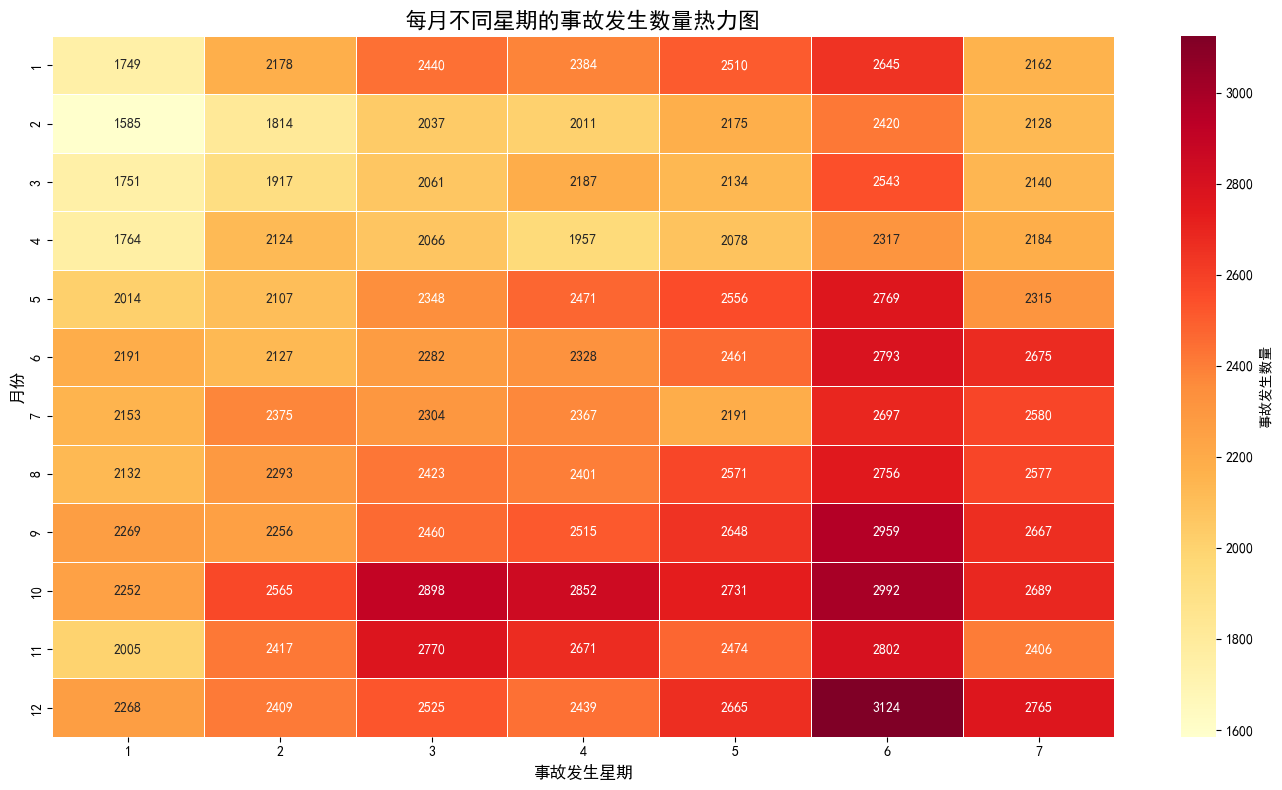

In [24]:
plt.figure(figsize=(14, 8))
sns.heatmap(toshibiao, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=.5, cbar_kws={"label": "事故发生数量"})

plt.title('每月不同星期的事故发生数量热力图', fontsize=16)
plt.xlabel('事故发生星期', fontsize=12)
plt.ylabel('月份', fontsize=12)
plt.tight_layout()
plt.show()

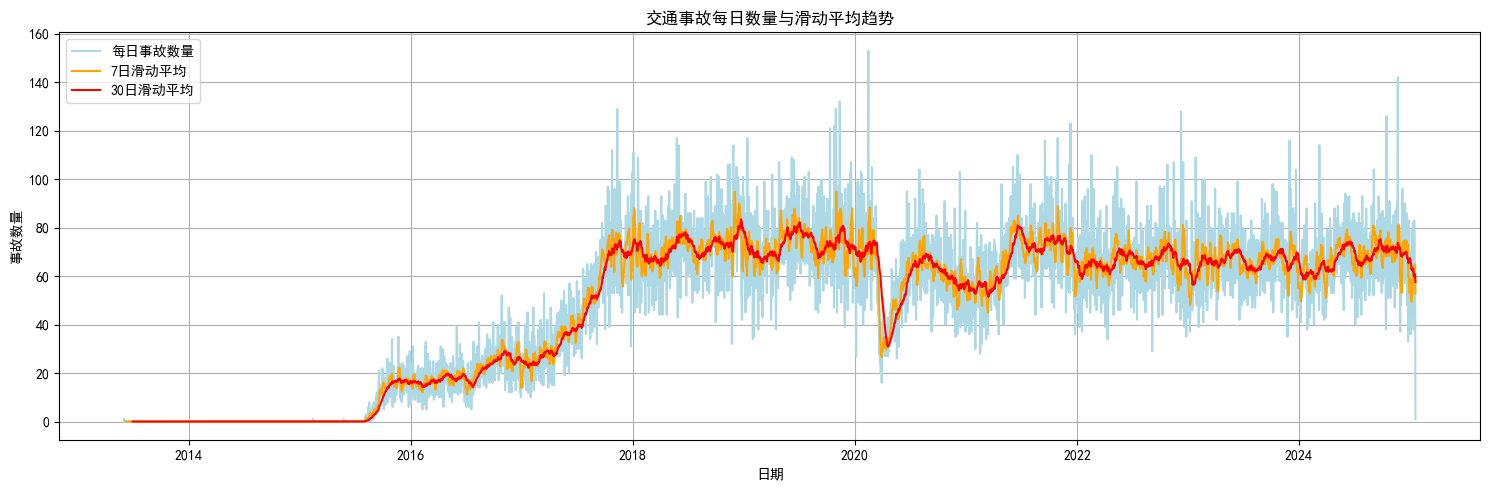

In [26]:
#df.set_index('事故日期', inplace=True)

# Step 2: 按天统计事故数量（时间序列）
daily_accidents = df.resample('D').size()  # 'D' 是 day

# Step 3: 绘制原始事故数量折线图
plt.figure(figsize=(15, 5))
plt.plot(daily_accidents, label='每日事故数量', color='lightblue')

# Step 4: 添加滑动平均线（7天和30天）
plt.plot(daily_accidents.rolling(window=7).mean(), label='7日滑动平均', color='orange')
plt.plot(daily_accidents.rolling(window=30).mean(), label='30日滑动平均', color='red')

# 美化图表
plt.title('交通事故每日数量与滑动平均趋势')
plt.xlabel('日期')
plt.ylabel('事故数量')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()